Final Project Instructions

Steps 1-2 below are preparatory, while Steps 3-5 should appear in the Jupyter notebook uploaded to GitHub.

1) Get astropy and install it on your system (pip install astropy).

2) Get sep and install it on your system (pip install sep).

3) Follow the tutorial found at https://sep.readthedocs.io/en/v1.0.x/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

4) Augment the tutorial to save each of the four figures to PNG files.

5) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

You can download it from https://archive.stsci.edu/pub/hlsp/hudf12/Links to an external site..

6) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

7) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean?

8) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.


#========== FILES ARE SAVED UNDER DIFFERENT NAMES ===========
See submitted folder for updated file names

#Redone Tutorial

In [1]:
!pip install sep
!pip install astropy
!pip install fitsio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.2.1-cp310-cp310-linux_x86_64.whl size=814910 sha256=795dbd10ea895e4e76abb24a281e9d50556379dcc293d52553690d63c10e06ad
  Stored in directory: /root/.cache/pip/wheels/94/70/18/2789914e7e79d73c282daba3cc5e5984c5e9a84962f68bf7bc
Successfully built fitsio


In [2]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

In [3]:
rcParams['figure.figsize']=[10.,8.]

data = fits.getdata('finaldata105.fits')
data = data.byteswap().newbyteorder()

^Creates array 'data' that contains the data from the .fits file 'finaldata105'


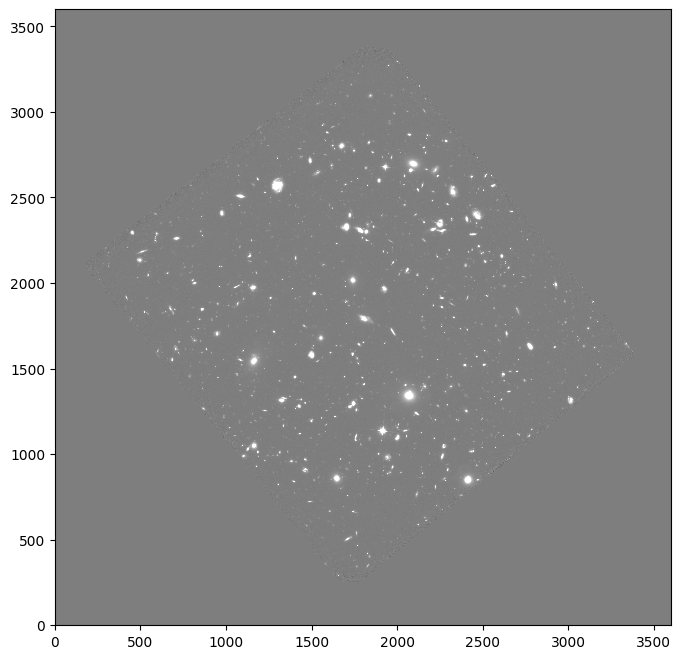

In [4]:
m,s = np.mean(data),np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('CyrusCorrellFINALgraymap.png', dpi=600, bbox_inches='tight')

Plots data and saves file as CyrusCorrellFINALgraymap.png


In [5]:
bkg = sep.Background(data)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


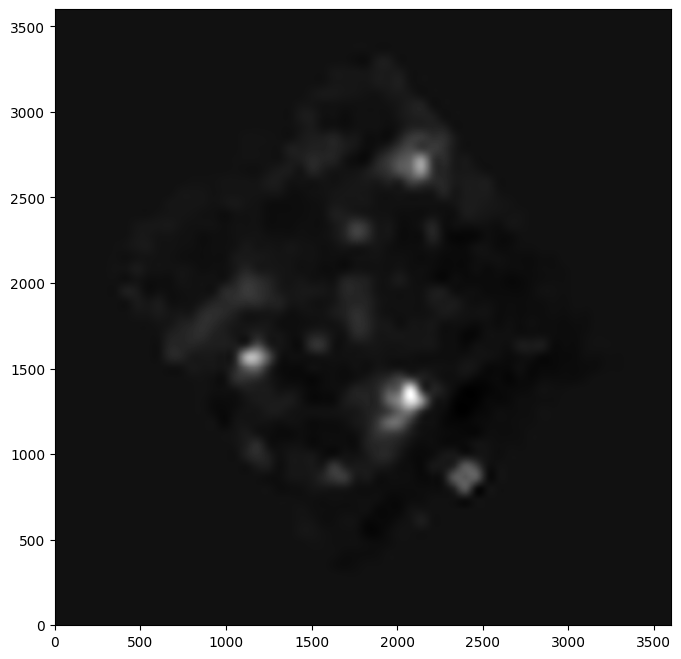

In [7]:
bkgimage=bkg.back()
plt.imshow(bkgimage, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('CyrusCorrellFINALBkgimage.png', dpi=600, bbox_inches='tight')

Plots the background of data, saves file as CyrusCorrellFINALBkgimage.png


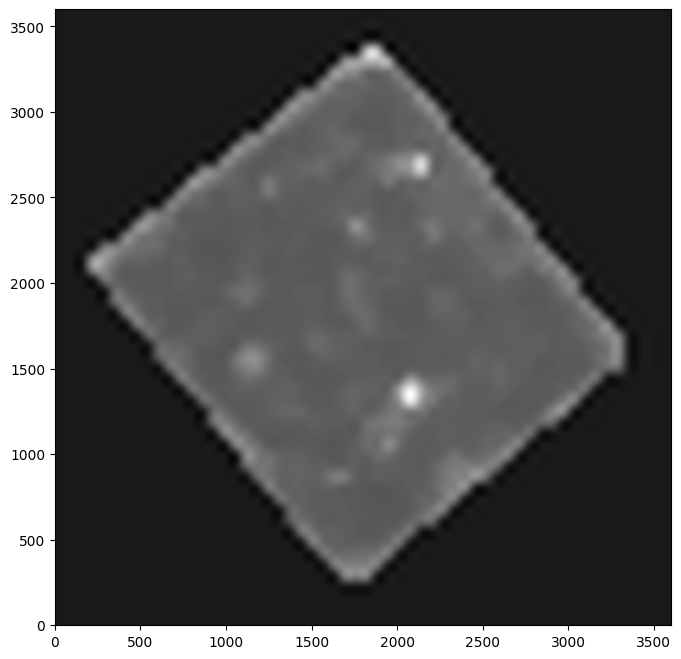

In [8]:
bkgrms=bkg.rms()
plt.imshow(bkgrms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('CyrusCorrellFINALBkgrms.png', dpi=600, bbox_inches='tight')

plots the rms of the data and saves the file

In [9]:
datasub=data-bkg

In [10]:
threshold= 5 #play around with this ****************************
objects=sep.extract(datasub,threshold,err=bkg.globalrms)


Sets the flux threshold for the sep extraction and creates array 'objects' containing the information of the sep extraction

In [11]:
len(objects)


2634

Checks size of objects

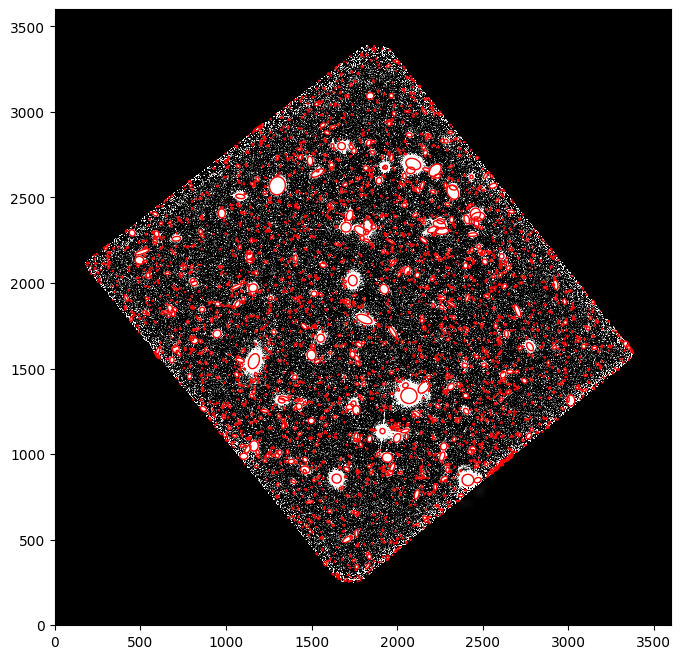

In [12]:
fig,ax=plt.subplots()
m,s = np.mean(datasub),np.mean(datasub)
im = ax.imshow(datasub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('CyrusCorrellFINALcircleddata.png', dpi=600, bbox_inches='tight')

In [13]:
flux, fluxerr, flag = sep.sum_circle(datasub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [14]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029248 +/- 0.171045
object 1: flux = 0.081285 +/- 0.285120
object 2: flux = 0.062260 +/- 0.249537
object 3: flux = 0.069449 +/- 0.263548
object 4: flux = 0.039489 +/- 0.198739
object 5: flux = 0.104682 +/- 0.323559
object 6: flux = 0.040038 +/- 0.200116
object 7: flux = 0.053010 +/- 0.230257
object 8: flux = 0.053288 +/- 0.230859
object 9: flux = 0.042534 +/- 0.206259


#Flux Histogram

<ipython-input-15-10215d0caac2>:1: RuntimeWarning: invalid value encountered in log10
  logflux=np.log10(flux)


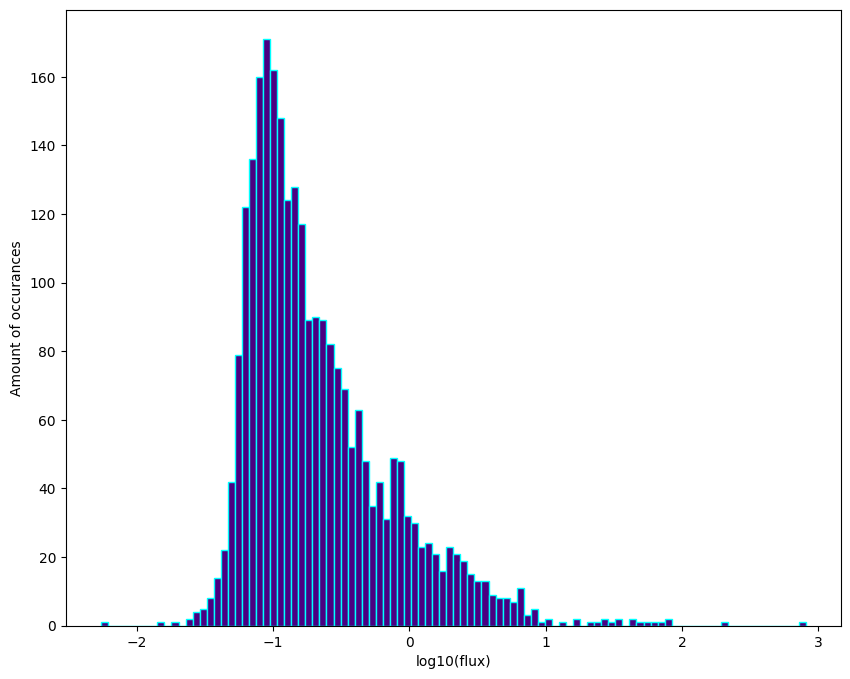

In [15]:
logflux=np.log10(flux)
plt.hist(logflux,bins=100,color='indigo',edgecolor='cyan')
plt.xlabel('log10(flux)')
plt.ylabel('Amount of occurances')
plt.savefig('CyrusCorrellFINALhistogram.png', dpi=600,bbox_inches='tight')

Creates histogram of log10(flux), and splits it into 100 bins

In [30]:
fm,fs, fmd =np.mean(flux),np.std(flux),np.median(flux)

print(f'Mean: {fm:21.3f} +/- {np.mean(fluxerr):.3f}\nStandard Deviation: {fs:7.3f} +/- {np.std(fluxerr):.3f}\nMedian: {fmd:19.3f} +/- {np.median(fluxerr):.3f}')

Mean:                 1.144 +/- 0.599
Standard Deviation:  16.720 +/- 0.886
Median:               0.151 +/- 0.389


In [31]:
sortedflux=np.sort(flux)
print(f'Largest outlier: {sortedflux[-1]:.4f}\nStandard deviations away:{(sortedflux[-1]-fm)/fs:.4f}')

Largest outlier: 807.3368
Standard deviations away:48.2178


Prints the largest outlier of the fluxes


#Making RGB Image


In [18]:
hdu1=fits.open('finaldata105.fits')
hdu2=fits.open('finaldata125.fits')
hdu3=fits.open('finaldata160.fits')

In [19]:
data1=hdu1[0].data
data2=hdu2[0].data
data3=hdu3[0].data

In [20]:
def rescale_image(data):
  pdata_tmp=data.copy()
  m = np.nanmean(pdata_tmp)
  vplmin=m/2
  vpmin=np.log10(vplmin)
  vpmax=np.log10(m*100)
  pdata_tmp[pdata_tmp<vplmin]=vplmin
  pdata_tmp=np.log10(pdata_tmp)
  return pdata_tmp,vpmin,vpmax


In [21]:
def fitsquick(data,fnx=10,fny=10):
  f = plt.figure(figsize=(fnx,fny))
  pdatatmp,vpmin,vpmax=rescale_image(data)
  plt.imshow(pdatatmp,vmin=vpmin,vmax=vpmax)


In [22]:
data1res,d1min,d1max=rescale_image(data1)
data2res,d2min,d2max=rescale_image(data2)
data3res,d3min,d3max = rescale_image(data3)

In [23]:
rgb = np.zeros((data1res.shape[0],data1res.shape[1],3))

rgb[:,:,0]=(data1res-d1min)/(d1max-d1min)
rgb[:,:,1]=(data2res-d2min)/(d2max-d2min)
rgb[:,:,2]=(data3res-d3min)/(d3max-d3min)

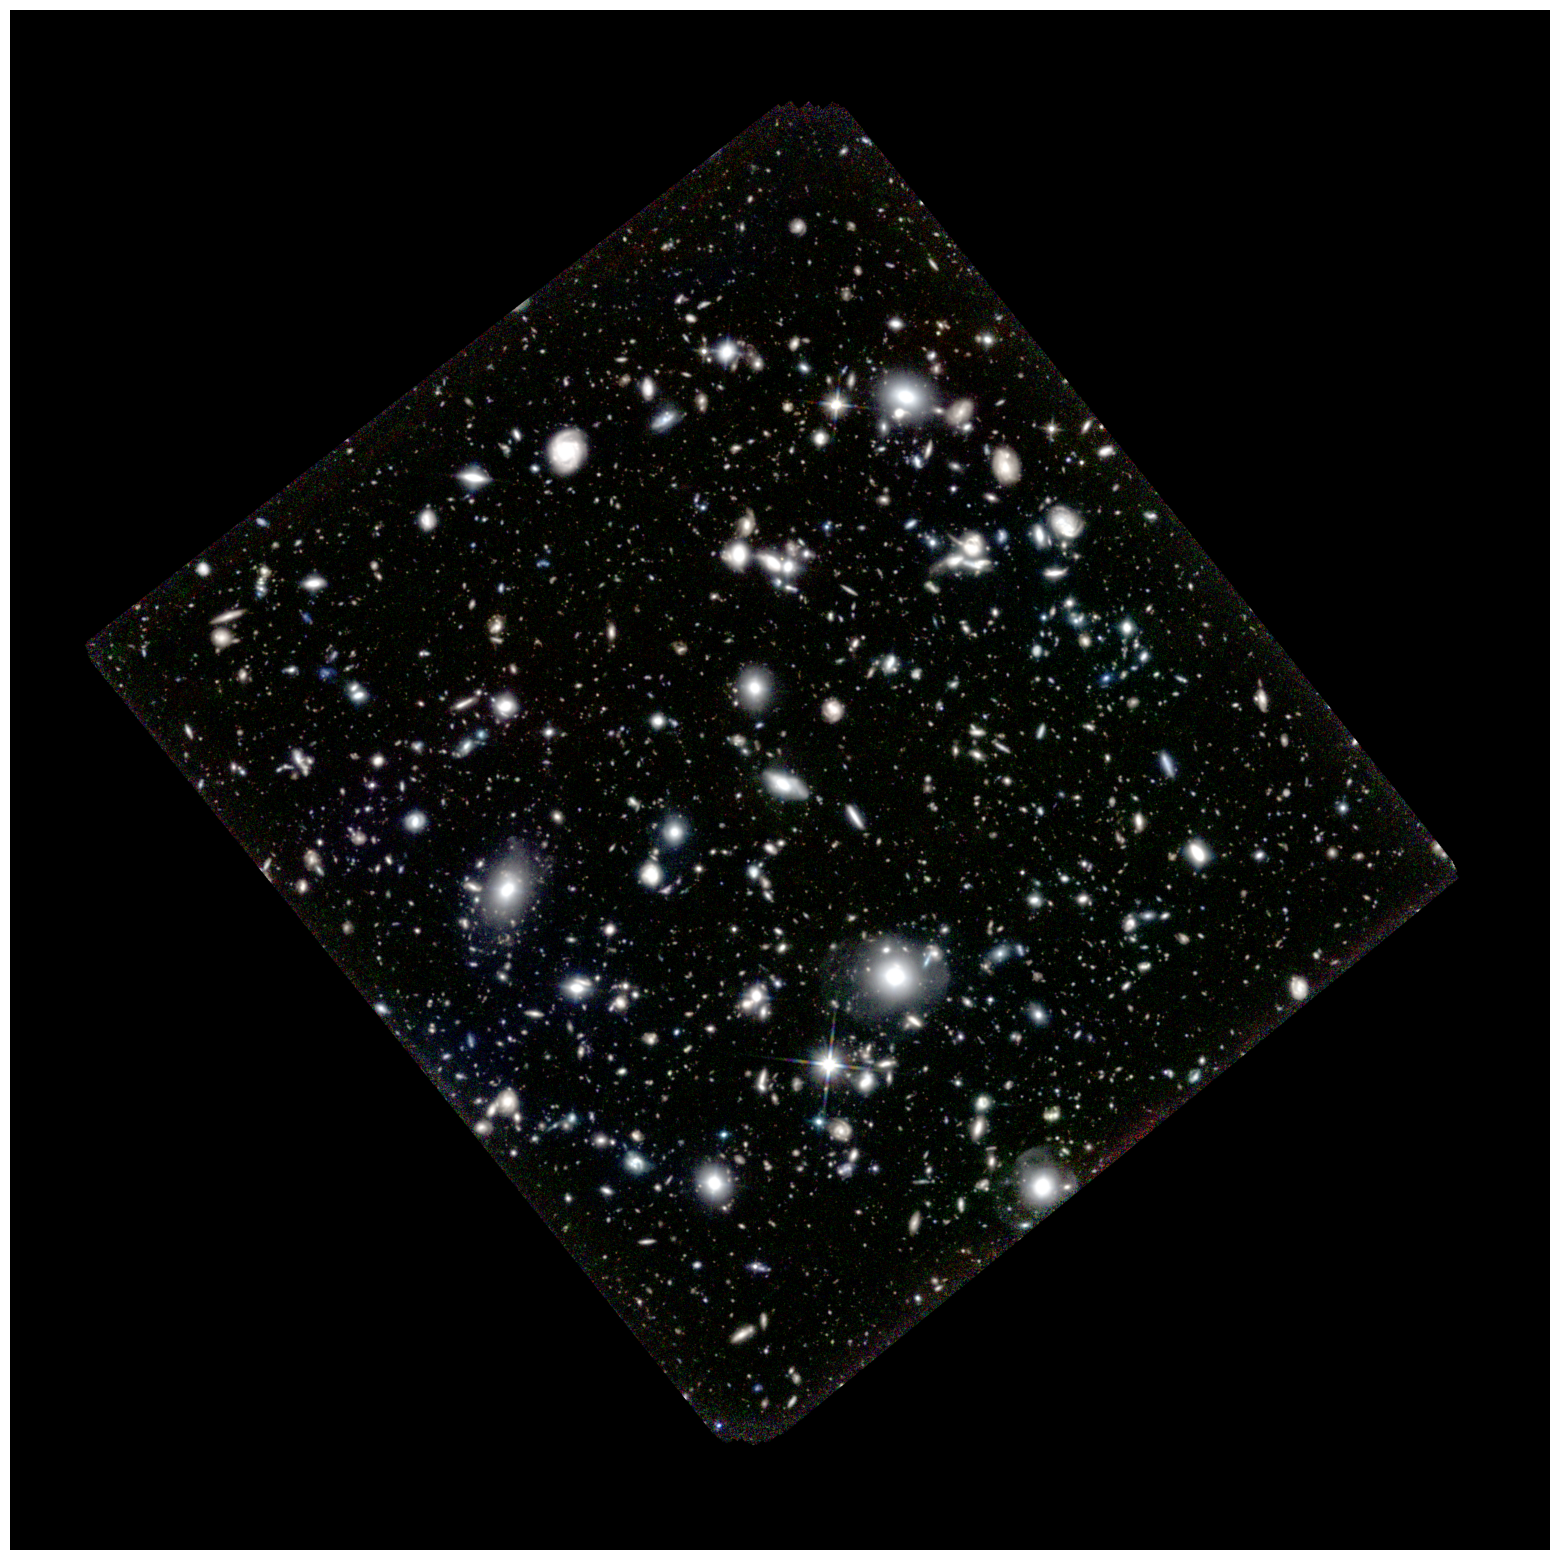

In [24]:
f,ax=plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb,origin='lower')
plt.savefig('CyrusCorrellFINALrgb.png', dpi=600,bbox_inches='tight')